# TP

KHANCHEL Souha
BEN ABDEJELIL Rim

# I. Chargement de l'image de cellules
On se propose tout au long de ce TP d'essayer de manipuler l'image de cellules qu'on a déjà utilisé lors d'un précédent TP.
Nous allons d'abord importer les bibliothèques qui nous seront utiles

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow, get_cmap
from PIL import Image, ImageDraw

# Question : 
Importez l'image et assurez-vous qu'elle est bien en niveaux de gris, puis affichez-là.

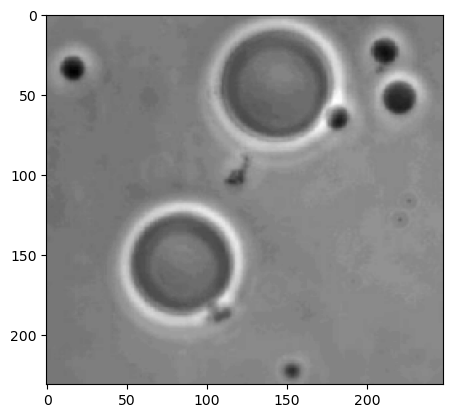

In [3]:
def displayTwoImages(im1,im2):
  _,axes=plt.subplots(ncols=2)
  axes[0].imshow(im1,cmap=plt.get_cmap('gray'))
  axes[1].imshow(im2,cmap=plt.get_cmap('gray'))

path ='cell_image.png'
image=cv2.imread(path)
graying = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(graying,cmap=get_cmap('gray'))

Lecture de l'image à partir d'un fichier, conversion en niveau de gris, et affichage de cette image

# II. Affichage du spectre d'amplitude

# Question 1
Utilisez la fonction fft.fft2() de numpy pour récupérer les données de l'image dans le domaine fréquentiel.

Le '2' dans fft2() indique que nous utilisons la transformée de Fourrier en 2 dimensions. Son premier argument est l’image d’entrée, qui est en niveaux de gris. Le second argument est optionnel et décide de la taille du tableau de sortie.


In [4]:
freq=np.fft.fft2(graying)

# Question 2
Si vous essayez d'afficher l'image, cela ne marchera pas, pourquoi?

TypeError: Image data of dtype complex128 cannot be converted to float

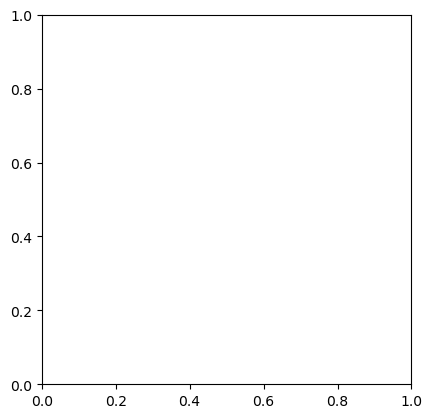

In [21]:
imshow(freq,cmap=get_cmap('gray'))

On ne peut pas afficher l'image car la transformée de Fourier 2D a une sortie de type matrice complexe et la fonction imshow() de Matplotlib ne peut pas afficher directement des nombres complexes car elle ne sait pas comment représenter visuellement la partie réelle et imaginaire des nombres complexes.

### Solution:


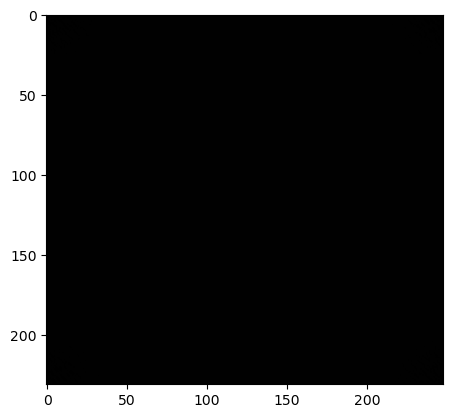

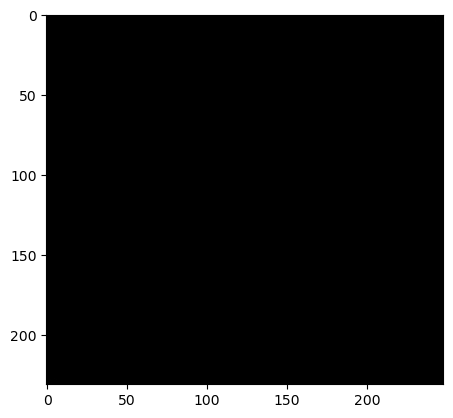

In [24]:
import numpy as np
import matplotlib.pyplot as plt
freq_real = np.real(freq)
#partie réelle
plt.imshow(freq_real, cmap='gray')
plt.show()
#spectre d'amplitude
mag = np.abs(freq)
plt.imshow(mag, cmap='gray')
plt.show()

# Question 3
Centrez les données autour de 0 en appliquant la fonction fft.fftshift() sur les fréquences.

In [25]:
shift_freq=np.fft.fftshift(freq)

# Question 4
Calculez le spectre de magnitude. 
Affichez l'image originale et son spectre d'amplitude (en nuances de gris).

On donne le spectre de magnitude par la formule suivante :
magnitude_spectrum = 20*np.log(np.abs(shifted_freq))

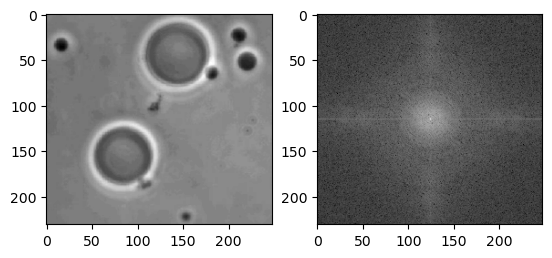

In [27]:
# Calcul du spectre de magnitude 
mag_spectrum = 20 * np.log(np.abs(shift_freq))

# affichage de l'image originale et son spectre cote a cote 
displayTwoImages(graying, mag_spectrum)

# III. Filtrage fréquentiel : Filtre passe-haut
Nous pouvons maintenant effectuer certaines opérations dans le domaine fréquentiel, comme le filtrage passe-haut et reconstruire l’image après filtrage en utilisant la Transformée de Fourrier inverse.

1. Supprimez les basses fréquences en masquant avec une fenêtre rectangulaire de taille 20x20. 
2. Appliquez le décalage inverse en utilisant ifftshift() (En d'autres termes, inverser l'operation qui a permis de centrer les données autour de 0). 
3. Calculez la FFT inverse en utilisant la fonction ifft2(). Le résultat, encore une fois, sera un chiffre complexe. 
4. Affichez la valeur absolue du résultat.

In [7]:
rows, cols = graying.shape

#calcul du centre de l'image
crow, ccol = rows/2, cols/2

# suppression des basses frequences en appliquant une fenetre au centre
shift_freq[int(crow-10):int(crow+10), int(ccol-10):int(ccol+10)] = 0

In [8]:
#decalage inverse
unshift_freq = np.fft.ifftshift(shift_freq)

In [9]:
#fft inverse pour avoir l'image dans le domaine spatial
backward = np.fft.ifft2(unshift_freq)

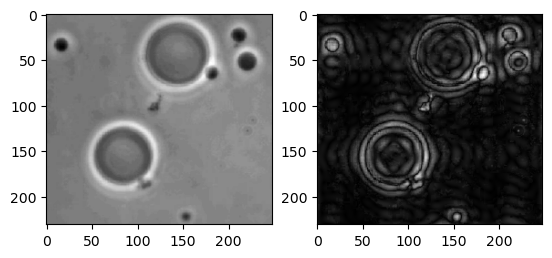

In [10]:
#mag de l'image apres filtrage
HP_result = np.abs(backward)

# affichage de l'image originale et l'image filtrée par un filtre passe haut cote a cote 
displayTwoImages(graying, HP_result)

On visualise l'effet du filtre passe-haut sur l'image, l'image filtrée met en évidence les contours et les détails de l'image d'origine.

# IV. Filtrage fréquentiel : Filtre passe-bas
Comme expliqué en cours, un filtre passe bas est le complémentaire d'un filtre pass-haut. 
Nous allons commencer par appliquer un filtre passe-bas rectangulaire. 

# Question 1
1. Commencez par créer une image de 0s (ou de 1 mais vous devrez faire le complémentaire plus tard) de la taille de votre image de cellule. 
2. Mettez-à 1 une fenêtre rectangulaire (au centre de l'image) dont le côté mesure 20 pixels 
3. Affichez le masque

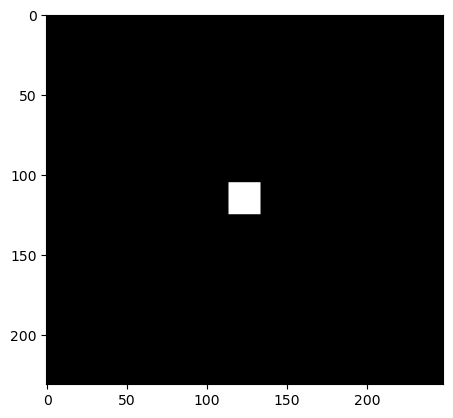

In [28]:
#definition d'un filtre passe bas
low_pass_rect=np.ones(graying.shape)

crow,ccol = rows/2,cols/2
#suppression des hautes frequences 
low_pass_rect[int(crow-10):int(crow+10),int(ccol-10):int(ccol+10)]=0
#les basses frequences sont intouchées
low_pass_rect=1-low_pass_rect 
#affichage du filtre
imshow(low_pass_rect,cmap=get_cmap('gray'))

# Question 2
1. Appliquez ce filtre sur le spectre de l'image 
2. Retrouvez comme fait précédemment l'image filtrée par Transformée de Fourrier Inverse.
3. Que remarquez-vous au niveau du résultat, en plus du fait que l'image de sortie soit fortement lissée?

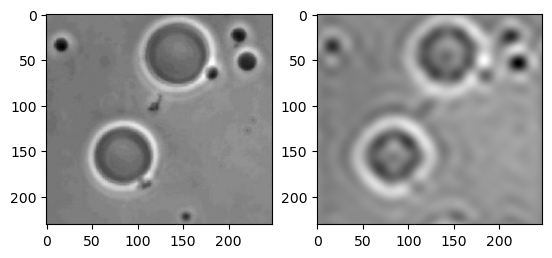

In [29]:
#on centre les basses frequences au milieu
shift_freq=np.fft.fftshift(freq)
#on applique le filtre passe bas 
LP_filter_rect=np.multiply(shift_freq,low_pass_rect)
#retour au domaine spatial
LP_result_rect=np.fft.ifft2(np.fft.ifftshift(LP_filter_rect))
LP_result_rect=np.abs(LP_result_rect)
# affichage de l'image originale et l'image filtrée par un filtre passe bas cote a cote 
displayTwoImages(graying,LP_result_rect )

L'image de sortie est plus lisse par rapport à l'image d'entrée car le filtre passe-bas applatit les contours ce qui entraîne une sortie floue. De plus, il peut y avoir des artefacts ou des effets de résonance près des bords de l'image en raison de la réponse en fréquence du filtre.

# Question 3
Nous allons maintenant créer un filtre passe-bas circulaire. 
1. Executez le code ci-dessous 
2. Affichez l'image originale et l'image résultante du filtrage.
3. Commentez le résultat en comparant le filtre pass-bas rectangulaire et circulaire.

Voici le code correspondant : 

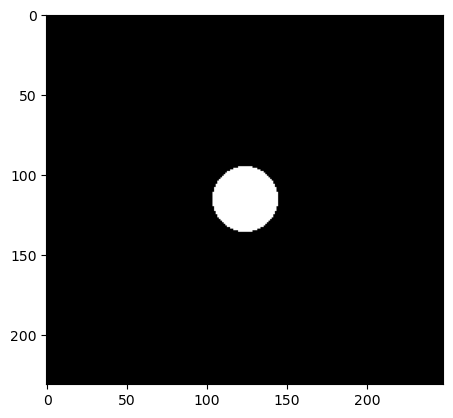

In [33]:
#dimensions de l'image
x,y = graying.shape[0],graying.shape[1]
#dimensions du cercle
e_x,e_y=40,40
bbox=((y/2)-(e_y/2),(x/2)-(e_x/2),(y/2)+(e_y/2),(x/2)+(e_x/2))

#une image avec des pixels noirs
low_pass=Image.new("L",(y,x),color=0) #L : single channel mode

#un cercle blanc 
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)
#affichage du filtre passe bas
imshow(low_pass, cmap=get_cmap('gray'))
#on centre les basses frequences au milieu
shift_freq = np.fft.fftshift(freq)
#on applique le filtre passe bas 
LP_filter= np.multiply(shift_freq,low_pass)
#domaine spatial
LP_result= np.fft.ifft2(np.fft.ifftshift(LP_filter))

LP_result= np.abs(LP_result)

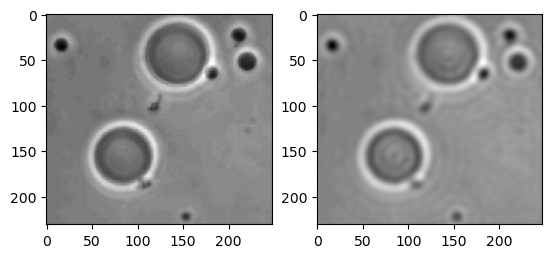

In [16]:
#Affichage des images
displayTwoImages(graying,LP_result )

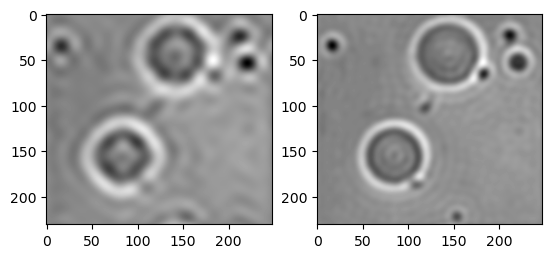

In [17]:
displayTwoImages(LP_result_rect,LP_result )

Le filtre circulaire permet de conserver les hautes fréquences présentes dans les coins de l'image. Le résultat de ce filtre aura donc moins de flou que le filtre rectangulaire

# V. Détection de contours et de coins

Maintenant, notre objectif est de détecter les contours des cellules en essayant d'appliquer les opérateurs: Sobel et Canny
1. Appliquez d'abord un lissage Gaussien de taille 3x3 à l'aide de la fonction cv2.GaussianBlur(...)
2. Appliquez un filtre de Sobel selon x, selon y, puis selon les 2 directions à la fois (Choisir convenablement les paramètres de la fonction cv2.Sobel()
3. Affichez les résultats de Sobel_x, Sobel_y
4. Appliquez la méthode de Canny cv2.Canny(..). Faites varier les deux seuils d'hystéresis jusqu'a obtenir le meilleur résultat selon vous.
5. Affichez le résulat final de Sobel (selon les 2 directions et après seuillage) et le résultat final de Canny
6. Comparez les résultats


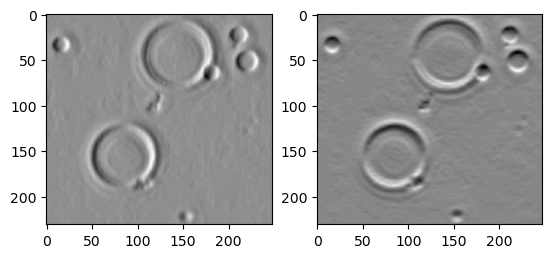

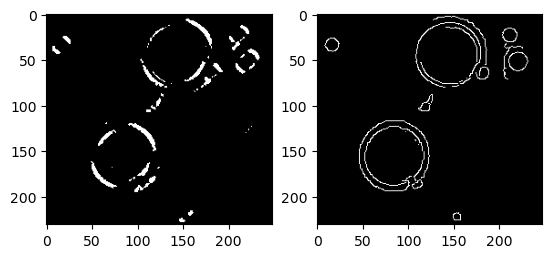

In [18]:
#bruit gaussien
image_blur=cv2.GaussianBlur(graying, (3,3), 0)
#on applique un sobel filter dans la direction des x a l'image bruitée
sobelx=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1,dy=0,ksize=5)
#on applique un sobel filter dans la direction des y a l'image bruitée
sobely=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=0,dy=1,ksize=5)
#on applique un sobel filter dans la direction des x et des y a l'image bruitée
sobelxy=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1,dy=1,ksize=5)

#affichage
displayTwoImages(sobelx,sobely)
#detection des contours
contour= cv2.Canny(image=image_blur,threshold1=10,threshold2=70)
#affichage des contours des images obtenues par le filtre sobel
displayTwoImages(sobelxy>40,contour)



## Interprétation
Le filtre de Sobel dans les directions x et y permet de détecter les gradients dans chaque direction pour mettre en évidence les contours horizontaux et verticaux de l'image.
Ensuite on détecte les contours de chaque image. Les résultats de la détection de contours à l'aide de Sobel en xy et de l'algorithme de Canny sont également affichés côte à côte.